# 100 leaves plant species

In [1]:
import numpy as np
import pandas as pd # para leer datos
import matplotlib.pyplot as plt
import sklearn.manifold
import sklearn.datasets
import glob
import sklearn.cluster
import umap

In [2]:
# Carga datos
data = pd.read_csv( 'data_Sha_64.txt' , delimiter=',' )
#data.head()

In [3]:
data.keys()
X = data[data.keys()[1:]] # para volver a tener los datos como imagen basta hacer data.reshape((n_imagenes, 8, 8))
Y = data[data.keys()[0]]
print(np.shape(X), np.shape(Y))

(1599, 64) (1599,)


In [4]:
species = np.array(Y.copy())
species = np.unique(species)

target = []
for i in range(len(Y)):
    for j in range(len(species)):
        if Y[i] == species[j]:
            target.append( j )

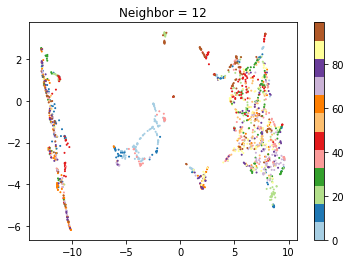

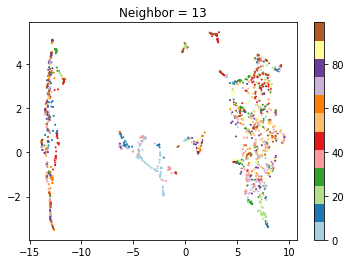

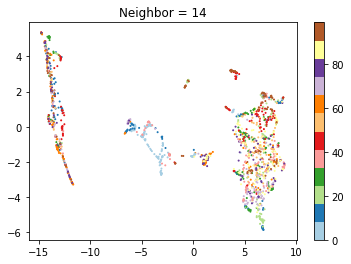

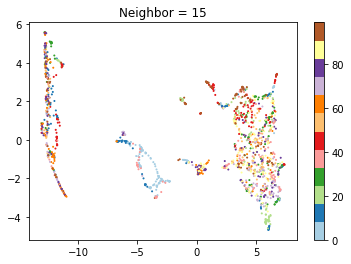

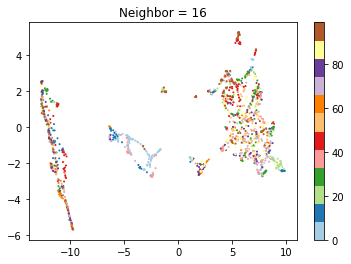

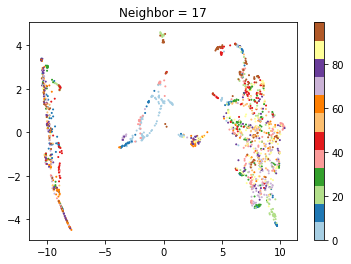

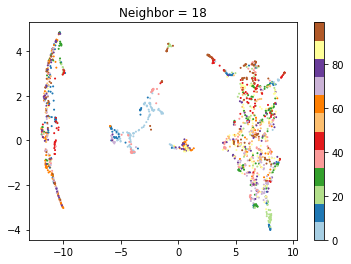

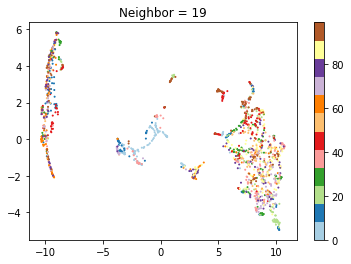

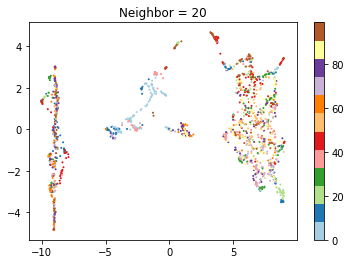

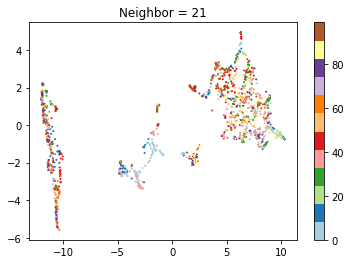

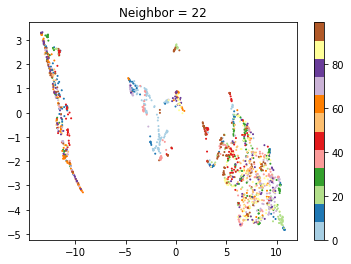

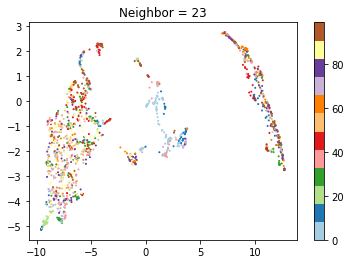

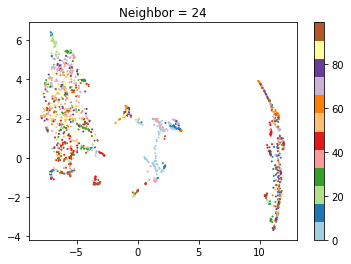

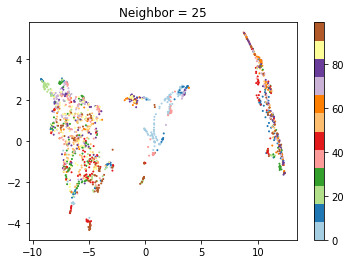

In [36]:
for nei in range(12,26):
    # UMAP
    reducer = umap.UMAP(n_neighbors=nei, metric='correlation')

    # Ahora ejecutamos la fase de aprendizaje
    reducer.fit(X)

    # Extraemos la representación de los datos en el espacio bidimensional
    embedding = reducer.embedding_
    
    
    plt.figure()
    plt.title( 'Neighbor = ' + str(nei) )
    plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Paired', s=1.0)
    plt.colorbar()
    plt.show()

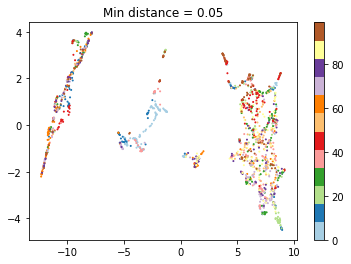

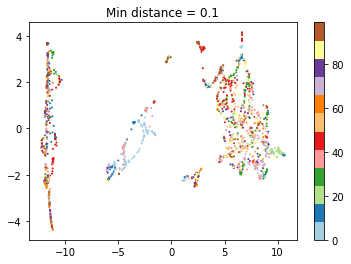

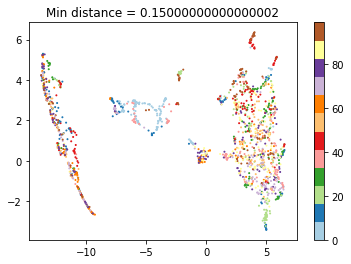

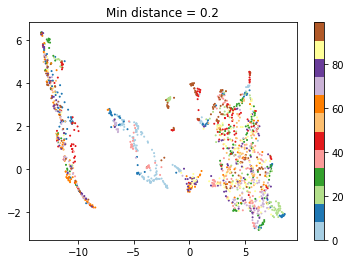

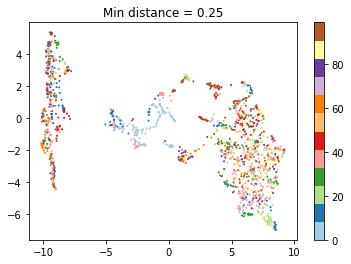

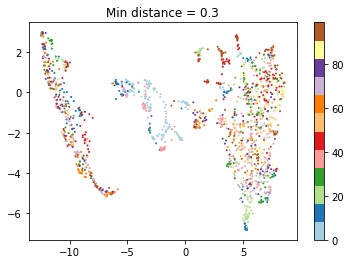

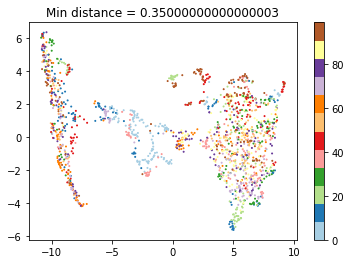

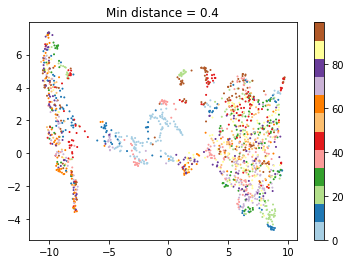

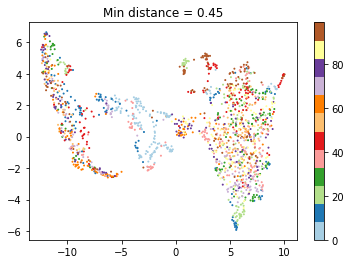

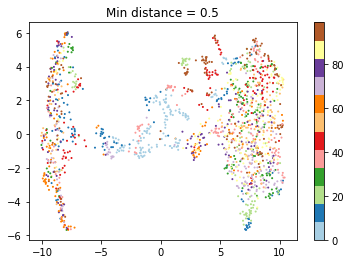

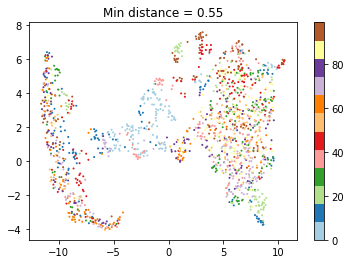

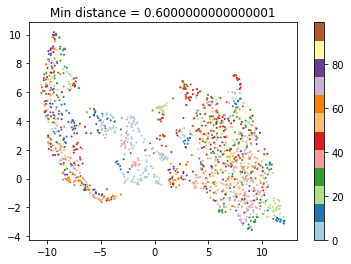

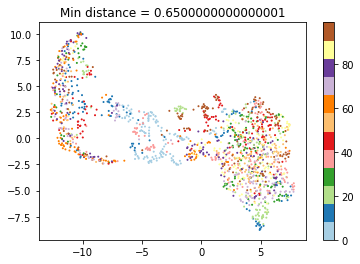

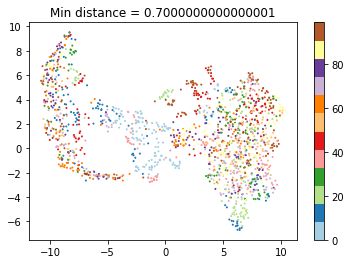

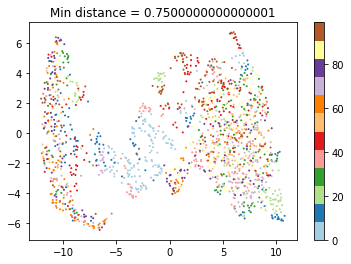

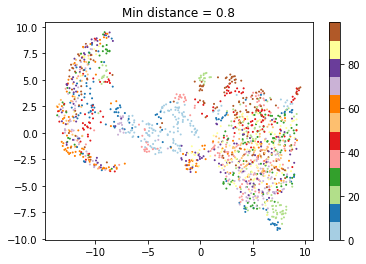

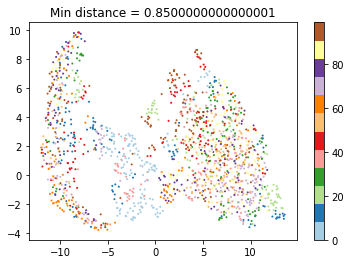

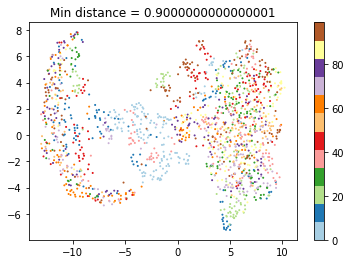

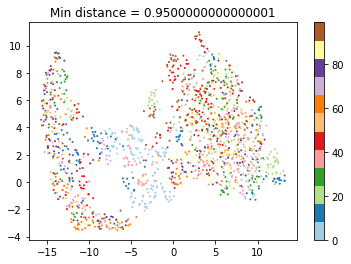

In [38]:
for mind in np.arange(0.05, 0.2, 0.05):
    # UMAP
    reducer = umap.UMAP(n_neighbors=19, min_dist=mind, metric='correlation')

    # Ahora ejecutamos la fase de aprendizaje
    reducer.fit(X)

    # Extraemos la representación de los datos en el espacio bidimensional
    embedding = reducer.embedding_
    
    
    plt.figure()
    plt.title( 'Min distance = ' + str(mind) )
    plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Paired', s=1.0)
    plt.colorbar()
    plt.show()

In [39]:
# UMAP
best_neighbors = 19
min_dist = 0.05
reducer = umap.UMAP(n_neighbors=best_neighbors, min_dist=min_dist, metric='correlation')

# Ahora ejecutamos la fase de aprendizaje
reducer.fit(X)

# Extraemos la representación de los datos en el espacio bidimensional
embedding = reducer.embedding_

In [40]:
# clusters sobre los resultados de tsne
n_clusters = 5
k_means = sklearn.cluster.KMeans(n_clusters=n_clusters)
k_means.fit(embedding) # training
cluster = k_means.predict(embedding) # predice a cual cluster corresponde cada elmento
distance = k_means.transform(embedding) # calcula la distancia de cada elemento al centro de su cluster

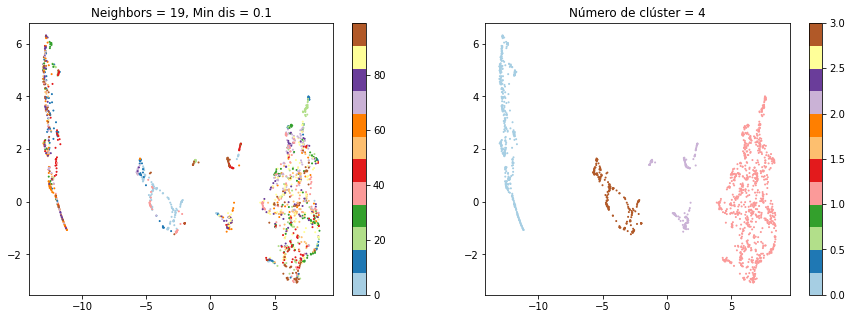

In [41]:
plt.figure(figsize=(15,5))
plt.angulos = np.linspace(0,2*np.pi,100)

plt.subplot(1,2,1)
plt.title( 'Neighbors = ' + str(best_neighbors) + ', Min dis = ' + str(mind_ist) )
plt.scatter(embedding[:,0], embedding[:,1], c=target, cmap='Paired', s=1.0)
plt.colorbar()


plt.subplot(1,2,2)
plt.title( 'Número de clúster = ' + str(n_clusters) )
plt.scatter(embedding[:,0], embedding[:,1], c=cluster, cmap='Paired', s=1.0)
plt.colorbar()

## Este dataset cuenta con 1599 instancias que corresponden a la vectorrización de las imágenes de las hojas, en escala de grises, de 100 diferentes especies de plantas. En el resultado obtenido tanto con umap como con k-means se logra identificar que los tipos de hojas se pueden clasificar en 4 diferentes grupos.